In [1]:
from sklearn.cluster import AgglomerativeClustering, KMeans, MeanShift
import numpy as np
from scipy.cluster.hierarchy import dendrogram, linkage
import matplotlib.pyplot as plt
from sklearn.preprocessing import StandardScaler, Normalizer
from sklearn.datasets import load_iris, fetch_california_housing
from sklearn.metrics import accuracy_score, mean_squared_error, rand_score, fowlkes_mallows_score


>Для розв’язання задачi агломеративної кластеризацiї в модулi `sklearn.cluster`
наявний клас `AgglomerativeClustering`, важливими параметрами якого є кiлькiсть кластерiв `n_clusters`, метрика, що використовується
metric (за замовченням `metric=’euclidean’`), метод визначення зв’язаностi
`linkage()` (можливi значення `ward`, `complete`, `average`, `single`, за замовченням `ward`) та порогова вiдстань `distance_threshold`, яка задає максимальну вiдстань мiж кластерами, якi можливо об’єднати. Приклад використання класу:


#### 2) Загружаем датасет и достаем из него признаки Ирисов 

In [2]:
iris = load_iris()
X = iris.data

# список методів
# Каждый метод в списке представляет собой различный подход к определению расстояний между кластерами при объединении.
method_list = ['single', 'complete', 'average', 'weighted', 'centroid', 'median', 'ward']

#### 3) Кластеризация методом агломерации и вывод дендограм:

In [3]:
def fit_and_predict(X):
    """
    Кластеризует данные методом агломерации, используя AgglomerativeClustering.

    Параметры:
    - `X (numpy.ndarray)`: Матрица признаков для кластеризации.

    Возвращает:
    - `float`: Точность предсказаний, измеренная с использованием индекса Рэнда.
    """
    # создание AgglomerativeClustering
    aglom_cluster = AgglomerativeClustering(n_clusters=2)
    # кластеризация данных
    predictions = aglom_cluster.fit_predict(X)
    # измерение точности индексами Рэнда
    accuracy = rand_score(iris.target, predictions)
    # вывод меток класса присвоенных каждому обьекту
    print(aglom_cluster.labels_)
    return accuracy

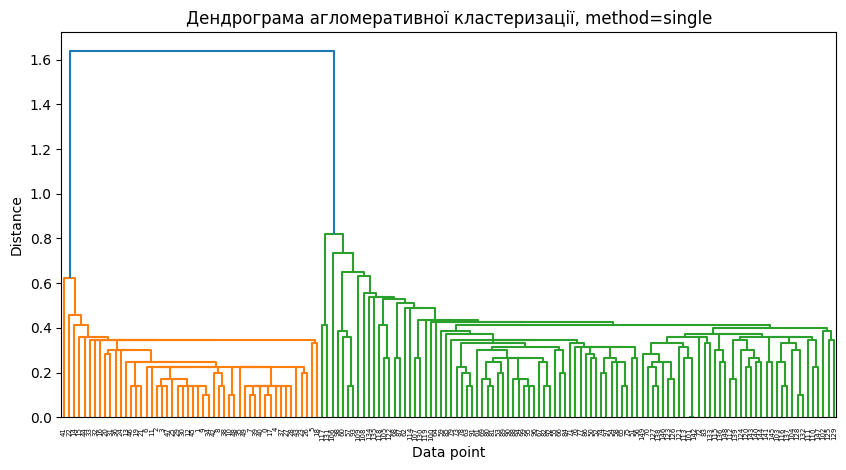

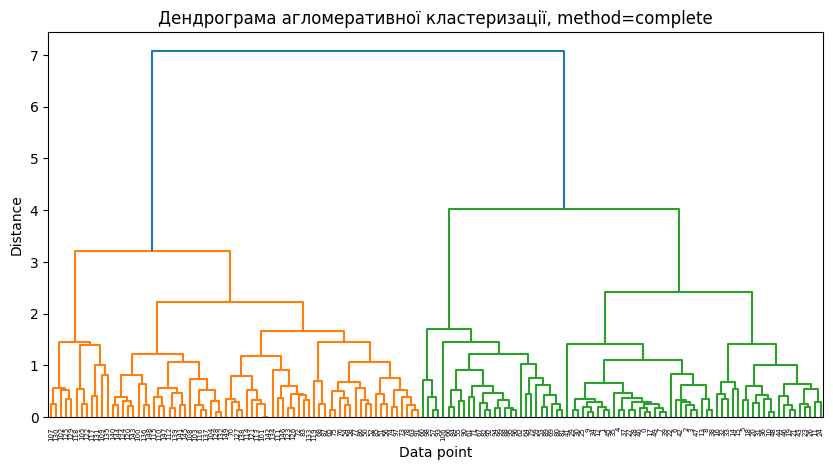

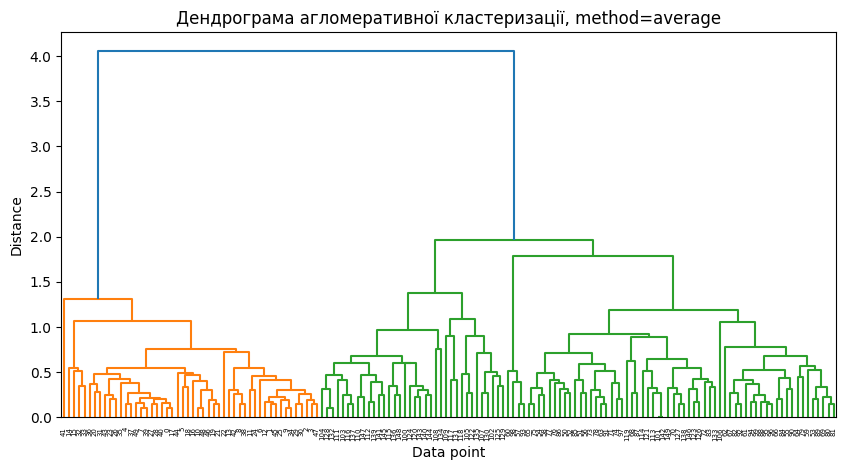

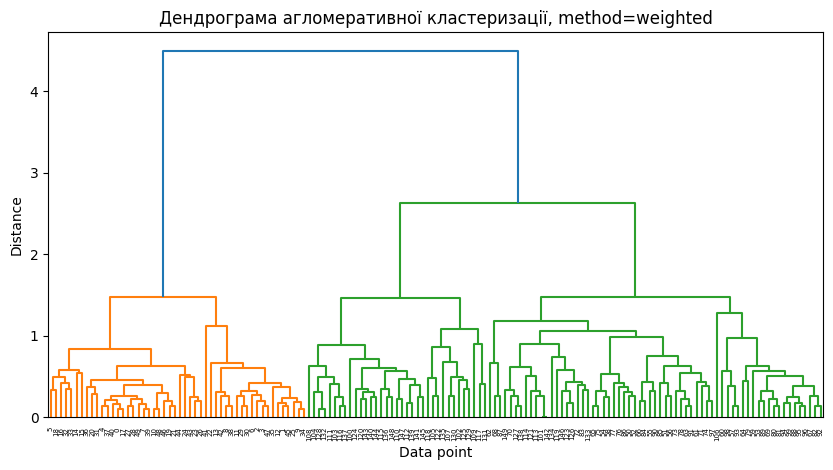

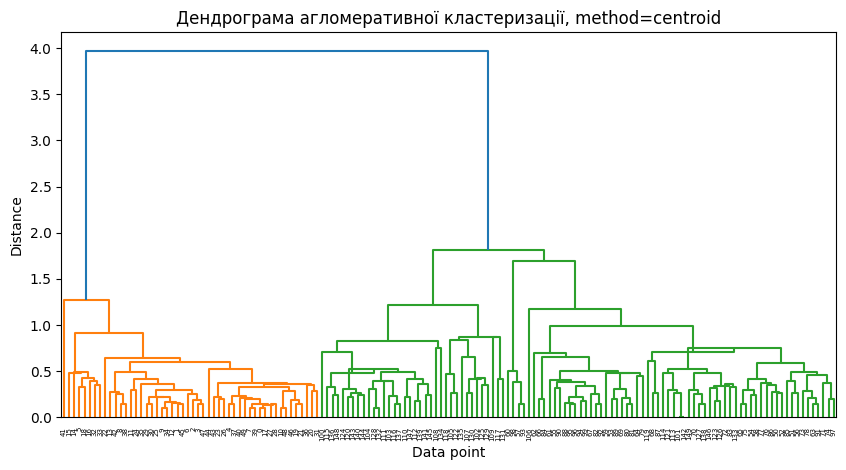

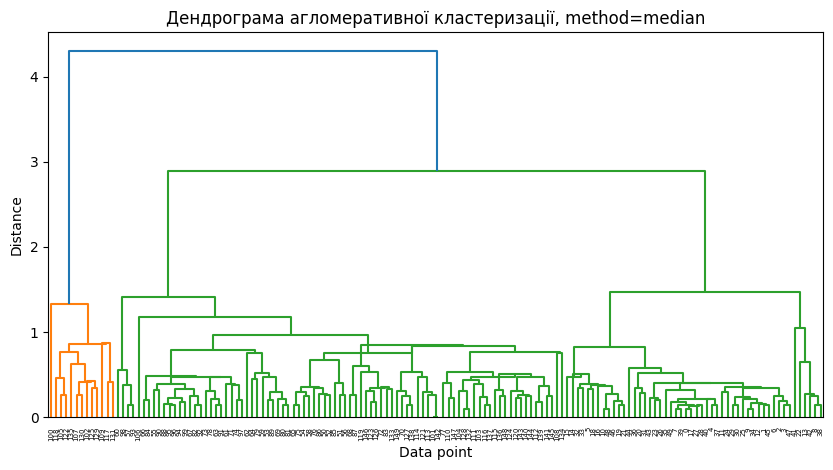

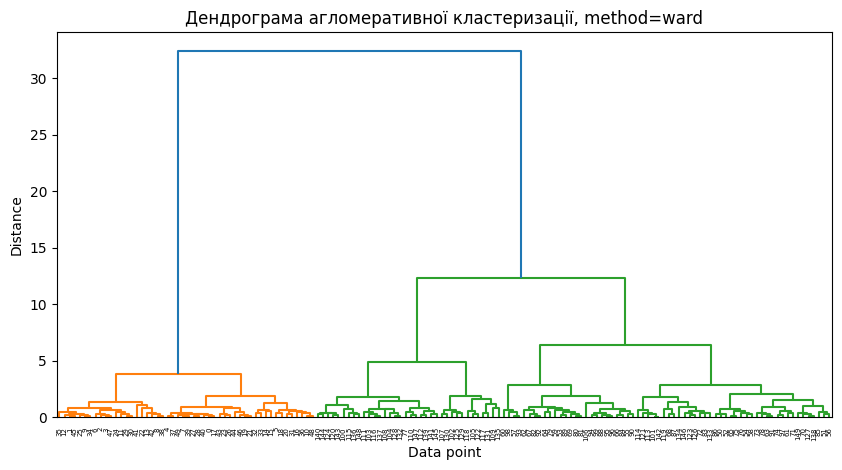

In [4]:
for method in method_list:
    # Построение матрицы связи A для текущего метода
    A = linkage(X, method=method)
    # Построение дендрограммы
    plt.figure(figsize=(10, 5))
    dendrogram(A)
    plt.title(f'Дендрограма агломеративної кластеризації, method={method}')
    plt.xlabel('Data point')
    plt.ylabel('Distance')
    plt.show()

#### 4) `Кластеризация признаков ирисов` с различными преобразованиями данных и вывод точности предсказаний для разных типов данных:

In [5]:
# для исходных данных.
accuracy = fit_and_predict(X)
print(f'features are not normalized: {accuracy}')

[1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1
 1 1 1 1 1 1 1 1 1 1 1 1 1 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0
 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0
 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0
 0 0]
features are not normalized: 0.7762863534675615


In [6]:
# для стандартизированных данных
X_scaled = StandardScaler().fit_transform(X)
accuracy_scaled = fit_and_predict(X_scaled)
print(f'features are standardized: {accuracy_scaled}')

[1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1
 1 1 1 1 0 1 1 1 1 1 1 1 1 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0
 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0
 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0
 0 0]
features are standardized: 0.7629530201342282


In [7]:
# для нормализованных данных
X_normalized = Normalizer().fit_transform(X)
accuracy_normalized = fit_and_predict(X_normalized)
print(f'features are normalized: {accuracy_normalized}')

[1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1
 1 1 1 1 1 1 1 1 1 1 1 1 1 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0
 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0
 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0
 0 0]
features are normalized: 0.7762863534675615


#### 5) Кластеризация данных `California Housing` методом `KMeans`:

In [8]:
def plot_metrics(cluster_range, metric_list_unnormalized, metric_list_normalized, title=None, scatter=False):
    """
    Визуализирует зависимость метрик от числа кластеров для необработанных и нормализованных данных.

    Параметры:
    - `cluster_range (range)`: Диапазон числа кластеров.
    - `metric_list_unnormalized (list)`: Список метрик для необработанных данных.
    - `metric_list_normalized (list)`: Список метрик для нормализованных данных.
    - `title (str)`: Заголовок графика.
    - `scatter (boolean)`: Вивести точковий графік.

    Возвращает:
    - `None`
    """
    if scatter: 
        plt.figure(figsize=(10, 5))
        plt.scatter(cluster_range, metric_list_unnormalized, marker='o', label='Не нормалізовані дані', color='crimson')
        plt.scatter(cluster_range, metric_list_normalized, marker='o', label='Нормалізовані дані', color='deepskyblue')
        plt.xlabel('Кількість кластерів')
        plt.ylabel('Точність')
        plt.title(title)
        plt.legend()
        plt.grid(True)
        plt.show()
    else:  
        plt.figure(figsize=(10, 5))
        plt.plot(cluster_range, metric_list_unnormalized, marker='o', label='Не нормалізовані дані', color='crimson')
        plt.plot(cluster_range, metric_list_normalized, marker='o', label='Нормалізовані дані', color='deepskyblue')
        plt.xlabel('Кількість кластерів')
        plt.ylabel('Точність')
        plt.title(title)
        plt.legend()
        plt.grid(True)
        plt.show()

In [9]:
# Кластеризация данных California Housing:
california = fetch_california_housing()
# извлечение первых 5000 данных  
X = california.data[:7000]
# стандартизация данных
X_scaled = StandardScaler().fit_transform(X)

In [10]:
# Кластеризация KMeans:

# Количество кластеров
cluster_range = range(2, 11)
# списки для тоности измеренной индексами Рєнда 
kmeans_accuracy_list_unnormalized_rand = []
kmeans_accuracy_list_normalized_rand = []
# списки для тоности измеренной индексами Фолкса-Меллоуза 
kmeans_accuracy_list_unnormalized_fowlkes = []
kmeans_accuracy_list_normalized_fowlkes = []

In [11]:
for cluster in cluster_range:
    # создание модели для нестандартизированных данных
    kmeans = KMeans(n_clusters=cluster)
    # обучение и вывод точности предсказаний
    predictions = kmeans.fit_predict(X)
    accuracy_rand = rand_score(california.target[:7000], predictions)
    kmeans_accuracy_list_unnormalized_rand.append(accuracy_rand)
    accuracy_fowlkes = fowlkes_mallows_score(california.target[:7000], predictions)
    kmeans_accuracy_list_unnormalized_fowlkes.append(accuracy_fowlkes)

    # создание модели для стандартизированных данных
    kmeans = KMeans(n_clusters=cluster)
    # обучение и вывод точности предсказаний
    predictions = kmeans.fit_predict(X_scaled)
    accuracy_rand = rand_score(california.target[:7000], predictions)
    kmeans_accuracy_list_normalized_rand.append(accuracy_rand)
    accuracy_fowlkes = fowlkes_mallows_score(california.target[:7000], predictions)
    kmeans_accuracy_list_normalized_fowlkes.append(accuracy_fowlkes)

c:\Users\kiril\AppData\Local\pypoetry\Cache\virtualenvs\intelligent-data-analysis-labs-TawrcNjr-py3.11\Lib\site-packages\sklearn\cluster\_kmeans.py:1416: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  super()._check_params_vs_input(X, default_n_init=10)
c:\Users\kiril\AppData\Local\pypoetry\Cache\virtualenvs\intelligent-data-analysis-labs-TawrcNjr-py3.11\Lib\site-packages\sklearn\metrics\cluster\_supervised.py:66: UserWarning: Clustering metrics expects discrete values but received continuous values for label, and binary values for target
  warnings.warn(msg, UserWarning)
c:\Users\kiril\AppData\Local\pypoetry\Cache\virtualenvs\intelligent-data-analysis-labs-TawrcNjr-py3.11\Lib\site-packages\sklearn\metrics\cluster\_supervised.py:66: UserWarning: Clustering metrics expects discrete values but received continuous values for label, and binary values for target
  warnings.warn(msg, UserWarnin

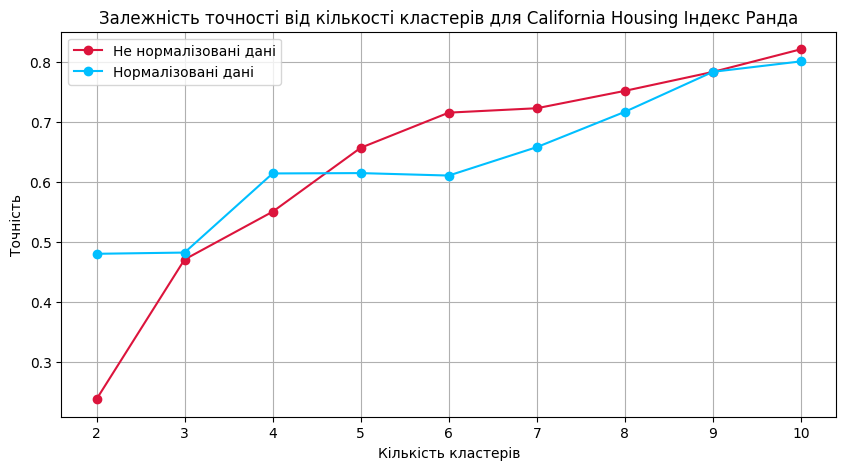

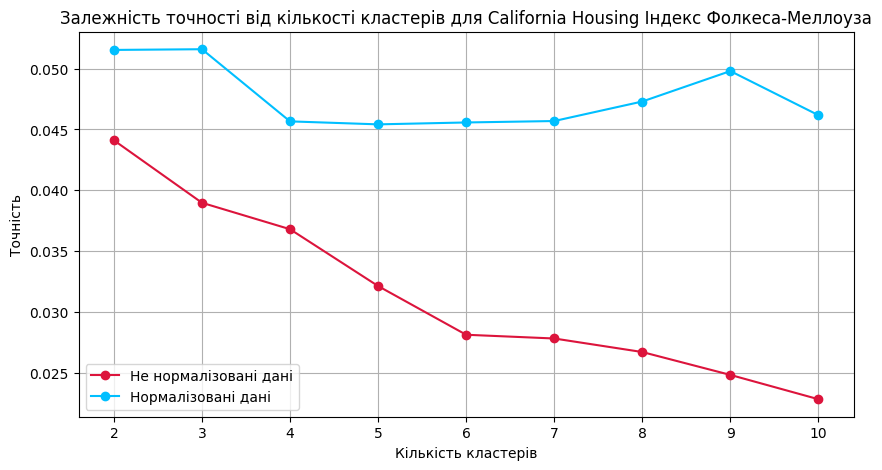

In [12]:
plot_metrics(cluster_range, kmeans_accuracy_list_unnormalized_rand, kmeans_accuracy_list_normalized_rand, 'Залежність точності від кількості кластерів для California Housing Індекс Ранда')
plot_metrics(cluster_range, kmeans_accuracy_list_unnormalized_fowlkes, kmeans_accuracy_list_normalized_fowlkes, 'Залежність точності від кількості кластерів для California Housing Індекс Фолкеса-Меллоуза')

#### 6) Кластеризация данных `California Housing` методом `MeanShift`:

In [15]:
# (bandwidth) от 0.1 до 0.5 с равномерным интервалом
bandwidth_range = np.linspace(0.1, 0.5, num=10)

# списки для тоности измеренной индексами Рєнда 
meanshift_accuracy_unnormalized_rand = []
meanshift_accuracy_normalized_rand = []
# списки для тоности измеренной индексами Фолкса-Меллоуза 
meanshift_accuracy_unnormalized_fowlkes = []
meanshift_accuracy_normalized_fowlkes = []

In [16]:
for bandwidth in bandwidth_range:
    # создание модели для нестандартизированных данных
    mean_shift = MeanShift(bandwidth=bandwidth)
    predictions = mean_shift.fit_predict(X)
    accuracy = rand_score(california.target[:7000], predictions)
    meanshift_accuracy_unnormalized_rand.append(accuracy)
    meanshift_accuracy_unnormalized_fowlkes.append(fowlkes_mallows_score(california.target[:7000], predictions))

    # создание модели для стандартизированных данных
    mean_shift = MeanShift(bandwidth=bandwidth)
    predictions = mean_shift.fit_predict(X_scaled)
    accuracy = rand_score(california.target[:7000], predictions)
    meanshift_accuracy_normalized_rand.append(accuracy)
    meanshift_accuracy_normalized_fowlkes.append(fowlkes_mallows_score(california.target[:7000], predictions))

c:\Users\kiril\AppData\Local\pypoetry\Cache\virtualenvs\intelligent-data-analysis-labs-TawrcNjr-py3.11\Lib\site-packages\sklearn\metrics\cluster\_supervised.py:66: UserWarning: Clustering metrics expects discrete values but received continuous values for label, and multiclass values for target
  warnings.warn(msg, UserWarning)
c:\Users\kiril\AppData\Local\pypoetry\Cache\virtualenvs\intelligent-data-analysis-labs-TawrcNjr-py3.11\Lib\site-packages\sklearn\metrics\cluster\_supervised.py:66: UserWarning: Clustering metrics expects discrete values but received continuous values for label, and multiclass values for target
  warnings.warn(msg, UserWarning)
c:\Users\kiril\AppData\Local\pypoetry\Cache\virtualenvs\intelligent-data-analysis-labs-TawrcNjr-py3.11\Lib\site-packages\sklearn\metrics\cluster\_supervised.py:66: UserWarning: Clustering metrics expects discrete values but received continuous values for label, and multiclass values for target
  warnings.warn(msg, UserWarning)
c:\Users\kiri

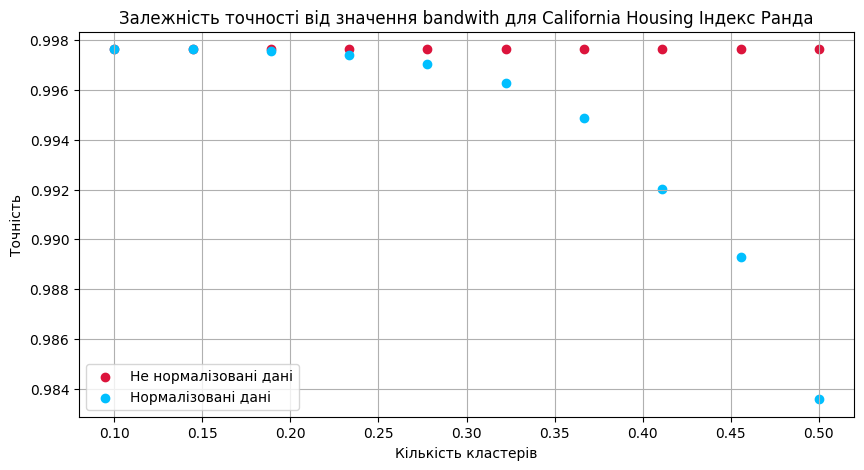

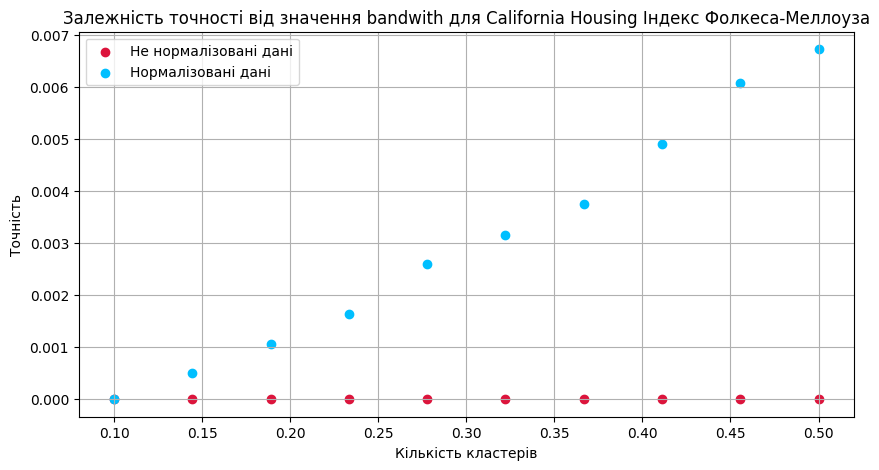

In [17]:
plot_metrics(bandwidth_range, meanshift_accuracy_unnormalized_rand, meanshift_accuracy_normalized_rand,'Залежність точності від значення bandwith для California Housing Індекс Ранда', True)
plot_metrics(bandwidth_range, meanshift_accuracy_unnormalized_fowlkes, meanshift_accuracy_normalized_fowlkes, 'Залежність точності від значення bandwith для California Housing Індекс Фолкеса-Меллоуза', True)

In [23]:
# Вывод результатов точности для KMeans (индекс Рэнда) на нестандартизированных данных
for i in cluster_range:
    print(f'{i} | {kmeans_accuracy_list_unnormalized_rand[i-2]:.5f} | {kmeans_accuracy_list_normalized_rand[i-2]:.5f}')

2 | 0.23788 | 0.48034
3 | 0.47083 | 0.48239
4 | 0.55051 | 0.61431
5 | 0.65709 | 0.61488
6 | 0.71569 | 0.61079
7 | 0.72302 | 0.65820
8 | 0.75200 | 0.71707
9 | 0.78359 | 0.78374
10 | 0.82141 | 0.80117


In [24]:
# Вывод результатов точности для KMeans (индекс Фолкса-Меллоуза) на нестандартизированных данных
for i in cluster_range:
    print(f'{i} | {kmeans_accuracy_list_unnormalized_fowlkes[i-2]:.5f} | {kmeans_accuracy_list_normalized_fowlkes[i-2]:.5f}')

2 | 0.04410 | 0.05153
3 | 0.03897 | 0.05159
4 | 0.03679 | 0.04566
5 | 0.03212 | 0.04541
6 | 0.02812 | 0.04557
7 | 0.02781 | 0.04569
8 | 0.02670 | 0.04729
9 | 0.02481 | 0.04980
10 | 0.02282 | 0.04617


In [25]:
# Вывод результатов точности для Mean Shift (индекс Рэнда) на нестандартизированных данных
for i, j in zip(bandwidth_range, range(len(meanshift_accuracy_unnormalized_rand))):
    print(f'{i:.5f} | {meanshift_accuracy_unnormalized_rand[j]:.5f} | {meanshift_accuracy_normalized_rand[j]:.5f}')

0.10000 | 0.99763 | 0.99763
0.14444 | 0.99763 | 0.99762
0.18889 | 0.99763 | 0.99757
0.23333 | 0.99763 | 0.99741
0.27778 | 0.99763 | 0.99705
0.32222 | 0.99763 | 0.99628
0.36667 | 0.99763 | 0.99486
0.41111 | 0.99763 | 0.99202
0.45556 | 0.99763 | 0.98929
0.50000 | 0.99763 | 0.98359


In [26]:
# Вывод результатов точности для Mean Shift (индекс Фолкса-Меллоуза) на нестандартизированных данных
for i, j in zip(bandwidth_range, range(len(meanshift_accuracy_unnormalized_rand))):
    print(f'{i:.5f} | {meanshift_accuracy_unnormalized_fowlkes[j]:.5f} | {meanshift_accuracy_normalized_fowlkes[j]:.5f}')

0.10000 | 0.00000 | 0.00000
0.14444 | 0.00000 | 0.00051
0.18889 | 0.00000 | 0.00107
0.23333 | 0.00000 | 0.00164
0.27778 | 0.00000 | 0.00260
0.32222 | 0.00000 | 0.00316
0.36667 | 0.00000 | 0.00375
0.41111 | 0.00000 | 0.00490
0.45556 | 0.00000 | 0.00608
0.50000 | 0.00000 | 0.00672
